# <span style='color:teal'> <u>Predictive Modeling for FASTag Fraud Detection Using Machine Learning</u>

## <span style='color:indigo'> Name : Anaswara Prasad G
## <span style='color:indigo'> Organization : EntryElevate
## <span style='color:indigo'> Submission date : 01/07/2024

## <span style='color:violet'>Table of Contents
1. [Overview of Problem Statement](#overview-of-problem-statement)
2. [Objective](#objective)
3. [Data Collection](#data-collection)
4. [Data Description](#data-description)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
6. [Data Preprocessing](#data-preprocessing)
7. [Visualization](#visualization)
8. [Feature Engineering](#feature-engineering)
9. [Data Splitting](#data-splitting)
10. [Model Selection](#model-selection)
11. [Model Training & Evaluation](#model-training&evaluation)
12. [Feature Selection](#feature-selection)
13. [Model Evaluation](#model-evaluation)
14. [Hyperparameter Tuning](#hyperparameter-tuning)
15. [Result](#result)
16. [Model Deployment](#model-deployment)
17. [Limitations](#limitations)
18. [Conclusion](#conclusion)
19. [Future Work](#future-work)

## <span style='color:blue'>1. Overview of Problem Statement <a id='overview-of-problem-statement'></a>
FASTag is an electronic toll collection system that automates toll payments for vehicles in India. Despite its convenience, the system is susceptible to fraudulent transactions, which can lead to significant financial losses and operational inefficiencies. The challenge is to accurately identify and predict fraudulent transactions to enhance the system's security and reliability.

## <span style='color:blue'>2. Objective <a id='objective'></a>
The objective of this project is to develop a machine learning model that can predict fraudulent FASTag transactions based on various features such as transaction details and vehicle information. By identifying fraudulent transactions early, the system can take necessary actions to prevent financial losses and improve trust in the system.

In [87]:
# Ignore warninggs
import warnings
warnings.filterwarnings('ignore')

## <span style='color:blue'>3. Data collection <a id='data-collection'></a>

In [88]:
import pandas as pd
df = pd .read_csv('C:\\Users\\deepz\\Downloads\\FastagFraudDetection.csv')

In [89]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [90]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


## <span style='color:blue'>4. Data Description <a id='data-description'></a>
**Data Source** : kaggle.com 

## [Dataset](https://www.kaggle.com/datasets/thegoanpanda/fastag-fraud-detection-datesets-fictitious/code)

## The dataset includes various features:

- ***transaction_id:*** Unique identifier for each transaction.
- ***time_stamp:*** Date and time of the transaction.
- ***vehicle_type:*** Type of the vehicle (e.g., car, truck).
- ***fastag_id:*** Unique identifier for the FASTag.
- ***toll_booth_id:*** Identifier for the toll booth where the transaction occurred.
- ***lane_type:*** Type of lane (e.g., regular, express).
- ***vehicle_dimension:*** Dimensions of the vehicle.
- ***transaction_amount:*** Amount charged for the transaction.
- ***amount_paid***: Amount actually paid.
- ***geographical_location***: Location of the toll booth.
- ***vehicle_speed:*** Speed of the vehicle at the time of transaction.
- ***vehicle_plate_number:*** vehicle's plate number.
- ***fraud_indicator:*** Indicator of whether the transaction was fraudulent or not.

### Dataset Size
**Number of records:** The total number of records in the dataset is 5000.

**Number of features:** 13

### <span style='color:green'>Importing Necessary modules

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [92]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


## <span style='color:blue'>5. Exploratory Data Analysis(EDA) <a id='exploratory-data-analysis'></a>

In [93]:
# To get the dimension of the dataset
df.shape

(5000, 13)

In [94]:
# To get the concise summary of a Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [95]:
# columns
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [96]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [97]:
df['Transaction_Hour'] = df['Timestamp'].dt.hour

In [98]:
# Data types of each columns in the dataframe
df.dtypes

Transaction_ID                    int64
Timestamp                datetime64[ns]
Vehicle_Type                     object
FastagID                         object
TollBoothID                      object
Lane_Type                        object
Vehicle_Dimensions               object
Transaction_Amount                int64
Amount_paid                       int64
Geographical_Location            object
Vehicle_Speed                     int64
Vehicle_Plate_Number             object
Fraud_indicator                  object
Transaction_Hour                  int32
dtype: object

### <span style='color:green'> Identifying numerical and categorical columns

In [99]:
# Numerical columns
num_cols = df.select_dtypes(include='int').columns
print(num_cols)

Index(['Transaction_ID', 'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed',
       'Transaction_Hour'],
      dtype='object')


In [100]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object','datetime']).columns
print(cat_cols)

Index(['Timestamp', 'Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type',
       'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number',
       'Fraud_indicator'],
      dtype='object')


Out of 14 columns, 5 are numerical and 9 are categorical

### <span style='color:green'> Checking for null values

In [101]:
# finding missing values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
Transaction_Hour           0
dtype: int64

"It is clear that there are only missing values in the FastagID column."

In [102]:
# percentage of missing value in FastagID column
df['FastagID'].isnull().sum()/df.shape[0]*100

10.979999999999999

If the percentage of missing value is greater than 50%, we can drop that column. Here it is less than 50%, so no need to drop this column.

### <span style='color:green'> Checking for duplicates

In [103]:
#finding duplicates
df.duplicated().sum()

0

There are no duplicate values

### <span style='color:green'> Understand the distribution of data

In [104]:
# Statistical summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction_ID,5000.0,2500.5,1.0,1250.75,2500.5,3750.25,5000.0,1443.520003
Timestamp,5000,2023-06-13 06:32:39.756000,2023-01-01 00:00:00,2023-03-14 02:42:00,2023-06-02 17:22:30,2023-09-08 08:06:45,2023-12-31 21:45:00,NaN
Transaction_Amount,5000.0,161.062,0.0,100.0,130.0,290.0,350.0,112.44995
Amount_paid,5000.0,141.261,0.0,90.0,120.0,160.0,350.0,106.480996
Vehicle_Speed,5000.0,67.8512,10.0,54.0,67.0,82.0,118.0,16.597547
Transaction_Hour,5000.0,11.5528,0.0,6.0,12.0,17.0,23.0,6.817427


In [105]:
# statistical summary of columns with data type 'object'
df.describe(include='object').T

,count,unique,top,freq
Vehicle_Type,5000,7,Bus,716
FastagID,4451,4451,FTG-001-ABC-121,1
TollBoothID,5000,6,B-102,1432
Lane_Type,5000,2,Regular,2858
Vehicle_Dimensions,5000,3,Large,2144
Geographical_Location,5000,5,"13.059816123454882, 77.77068662374292",1000
Vehicle_Plate_Number,5000,5000,KA11AB1234,1
Fraud_indicator,5000,2,Not Fraud,4017


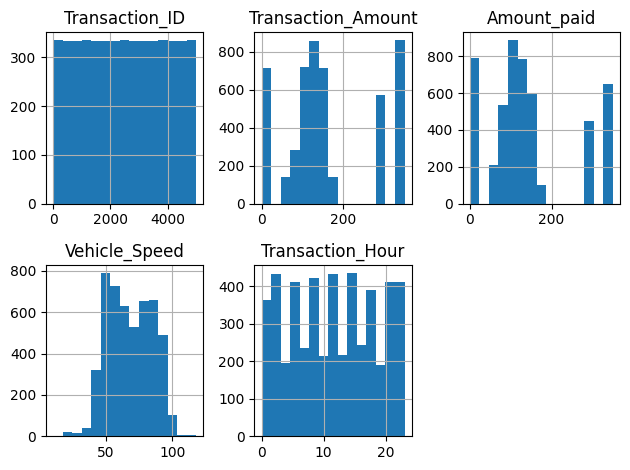

In [106]:
#Histograms for numerical columns
df[num_cols].hist(bins=15,layout=(2,3))
plt.tight_layout()
plt.show()

The histograms show that Transaction_IDs are uniformly distributed, Transaction_Amount and Amount_paid have multiple peaks indicating common transaction values, Vehicle_Speed is right-skewed with more lower speeds, and Transaction_Hour is fairly uniform throughout the day.

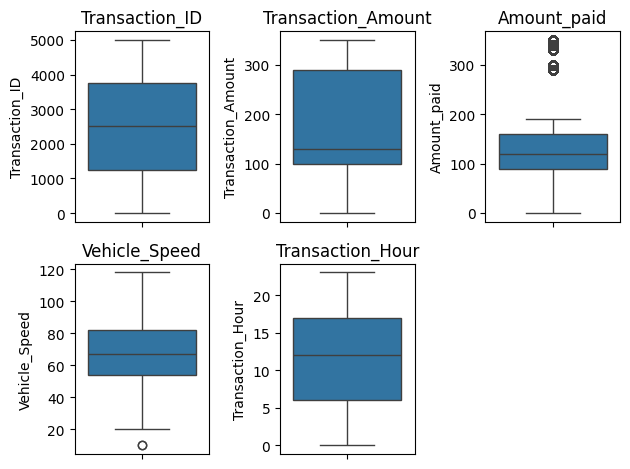

In [107]:
#box plotto identify outliers
plt.figure()
#enumerate() is a built in python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### There are some outliers in the 'Amount_paid' column, which are transactions with unusually high or low amounts. These outliers could indicate anomalies or errors in the data, potentially providing valuable insights into unusual or fraudulent transactions.There was also one outlier in the 'Vehicle_Speed' column. This outlier was similarly capped to ensure consistency in the dataset.

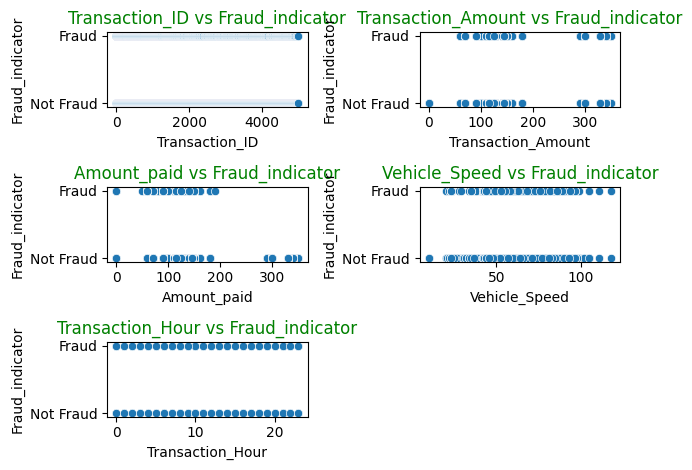

In [108]:
# scatter plot to identify the relationship between dependent (Fraud_indicator) and the undependent featues
plt.figure()

# Loop through each numerical column to create scatter plots
for i, col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df,x=col,y='Fraud_indicator')
    plt.xlabel(col)
    plt.title(f'{col} vs Fraud_indicator',color= 'green')
plt.tight_layout()
plt.show()

##### From the scatter plots, it is evident that the numerical features on their own do not provide a clear distinction between fraudulent and non-fraudulent transactions. This lack of clear separation highlights the complexity of fraud detection, where a single feature might not be sufficient to identify fraudulent behavior.

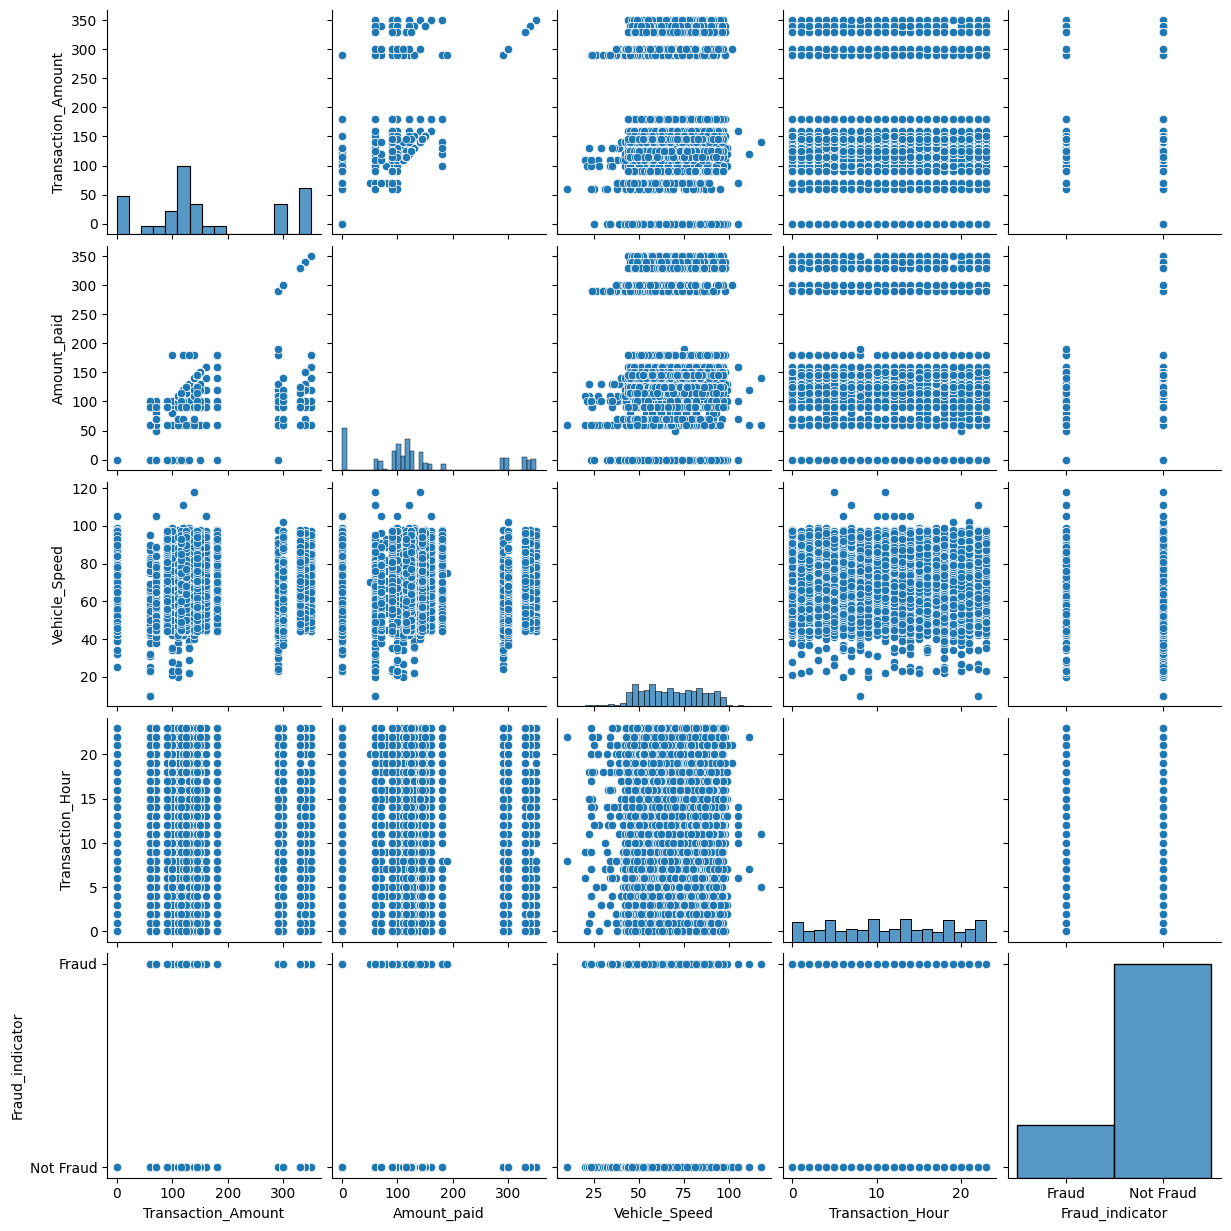

In [109]:
# To identify the relationship betweenthe target(denpendent variable 'Fraud_indicator' and indepndent numerical values) 
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed','Transaction_Hour','Fraud_indicator'])
plt.show()

### <span style='color:green'> Skewness and Kurtosis

In [110]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x,fisher=False))

print(skewness)
print(kurt)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Transaction_ID        0.000000
Transaction_Amount    0.404302
Amount_paid           0.700084
Vehicle_Speed         0.004415
Transaction_Hour     -0.001011
dtype: float64
Transaction_ID        1.800000
Transaction_Amount    1.993749
Amount_paid           2.483842
Vehicle_Speed         2.154858
Transaction_Hour      1.828696
dtype: float64
variable with positive skewness (skew > 1):
 Series([], dtype: float64)
variable with negative skewness (skew < -1):
 Series([], dtype: float64)
variables with platykurtic distribution (kurtosis < 3):
 Transaction_ID        1.800000
Transaction_Amount    1.993749
Amount_paid           2.483842
Vehicle_Speed         2.154858
Transaction_Hour      1.828696
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 Series([], dtype: float64)


#### Skewness:
The numerical features are relatively symmetrical, with no significant skewness (absolute value > 1).

#### Kurtosis:
All numerical features have kurtosis values less than 3, indicating platykurtic distributions, meaning they have lighter tails and flatter peaks compared to a normal distribution.

#### Implications for Model Building:
- The data does not require extensive normalization.
- The features are suitable for various machine learning algorithms without major transformations.
Overall, our numerical features are well-behaved with respect to skewness and kurtosis, simplifying the preprocessing steps for model building.

### <span style='color:green'> Correlation

<Axes: >

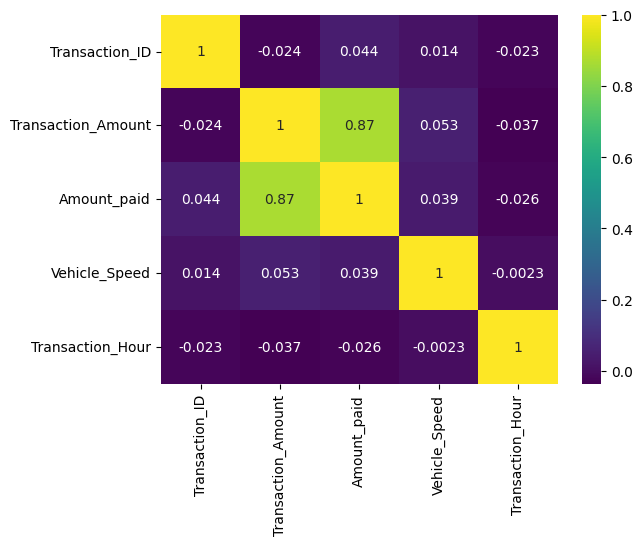

In [111]:
# correlation with heatmap to interpret the relation and multicollinarity
plt.figure()
sns.heatmap(df[num_cols].corr(),annot=True,cmap = 'viridis')

- **Transaction_Amount** and **Amount_paid** have a strong positive correlation (0.87), indicating they are closely related and may contain redundant information.
- All other features exhibit weak correlations with each other, suggesting little linear relationship.

#### <span style='color:green'> Multicollinearity
- Potential multicollinearity exists between **Transaction_Amount** and **Amount_paid**. Consider dropping one of these features to avoid redundancy in model building.

#### <span style='color:green'> Feature Selection
- Most features provide unique information and can be retained for model training.

The correlation analysis shows that while most features are weakly correlated and valuable for the model, careful handling of **Transaction_Amount** and **Amount_paid** is necessary to mitigate multicollinearity.

<Axes: xlabel='Transaction_Amount', ylabel='Amount_paid'>

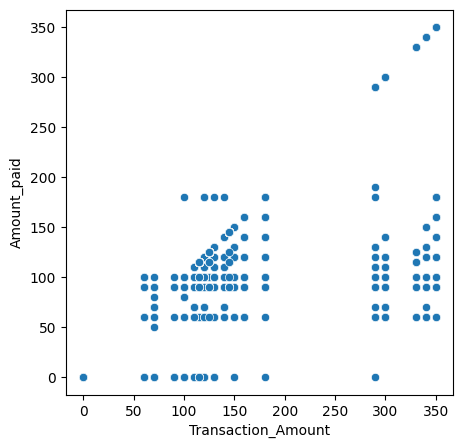

In [112]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x = 'Transaction_Amount',y = 'Amount_paid')

"So we can drop one of the columns, **Amount_paid** or **Transaction_Amount**, because they are highly correlated."

#### <span style='color:green'> Analysing Categorical columns

In [113]:
for col in cat_cols:
    print(f'Values in {col}:\n{df[col].unique()}')
    print(f'Number of unique values in {col}: {df[col].nunique()}\n')
    print("====================================================================================")

Values in Timestamp:
<DatetimeArray>
['2023-01-06 11:20:00', '2023-01-07 14:55:00', '2023-01-08 18:25:00',
 '2023-01-09 02:05:00', '2023-01-10 06:35:00', '2023-01-11 10:00:00',
 '2023-01-12 15:40:00', '2023-01-13 20:15:00', '2023-01-14 01:55:00',
 '2023-01-15 07:30:00',
 ...
 '2023-10-07 17:12:00', '2023-10-26 08:37:00', '2023-11-10 00:03:00',
 '2023-11-29 15:28:00', '2023-12-14 06:53:00', '2023-01-01 22:18:00',
 '2023-01-17 13:43:00', '2023-02-05 05:08:00', '2023-02-20 20:34:00',
 '2023-03-10 00:59:00']
Length: 4423, dtype: datetime64[ns]
Number of unique values in Timestamp: 4423

Values in Vehicle_Type:
['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Number of unique values in Vehicle_Type: 7

Values in FastagID:
['FTG-001-ABC-121' 'FTG-002-XYZ-451' nan ... 'FTG-447-PLN-109'
 'FTG-458-VFR-876' 'FTG-459-WSX-543']
Number of unique values in FastagID: 4451

Values in TollBoothID:
['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Number of unique values in TollBoothID: 6

Values

There are **4423** unique values in **Timestamp** column, **7** unique values in **Vehicle_Type** column, **4451** unique values in **FastagID** column, **6** unique values in **TollBoothID**, **2** unique values in **Lane_Type** column, **3** unique values in **Vehicle_Dimensions** column, **5** unique values in **Geographical_Location**, **5000** unique values in **Vehicle_Plate_Number** column, **2** unique values in **Fraud_indicator** column.


In [169]:
for col in cat_cols:
    cross_tab = pd.crosstab(df['Fraud_indicator'], df[col])
    print(f'Cross Tabulation between {col} and Fraud_indicator:')
    print(cross_tab)
    print('\n')
    print("====================================================================================")

Cross Tabulation between Timestamp and Fraud_indicator:
Timestamp        2023-01-01 00:00:00  2023-01-01 01:57:00  \
Fraud_indicator                                             
Fraud                              0                    0   
Not Fraud                          1                    1   

Timestamp        2023-01-01 03:40:00  2023-01-01 08:00:00  \
Fraud_indicator                                             
Fraud                              0                    0   
Not Fraud                          1                    1   

Timestamp        2023-01-01 08:15:00  2023-01-01 08:17:00  \
Fraud_indicator                                             
Fraud                              2                    0   
Not Fraud                          3                    1   

Timestamp        2023-01-01 08:18:00  2023-01-01 12:00:00  \
Fraud_indicator                                             
Fraud                              0                    0   
Not Fraud                 

In [115]:
pd.crosstab(df['Fraud_indicator'], df['Lane_Type'], margins = True)

Lane_Type,Express,Regular,All
Fraud_indicator,,,
Fraud,490,493,983
Not Fraud,1652,2365,4017
All,2142,2858,5000


In [116]:
pd.crosstab(df['Fraud_indicator'], df['Vehicle_Dimensions'], margins = True)

Vehicle_Dimensions,Large,Medium,Small,All
Fraud_indicator,,,,
Fraud,519,342,122,983
Not Fraud,1625,1086,1306,4017
All,2144,1428,1428,5000


In [117]:
pd.crosstab(df['Fraud_indicator'], df['Vehicle_Type'], margins = True)

Vehicle_Type,Bus,Car,Motorcycle,SUV,Sedan,Truck,Van,All
Fraud_indicator,,,,,,,,
Fraud,177,122,0,184,161,158,181,983
Not Fraud,539,592,714,530,553,556,533,4017
All,716,714,714,714,714,714,714,5000


- This tables helps us to understand the distribution of Fraud_indicator across **Lane_Type**, **Vehicle_Dimensions** and **Vehicle_Type**.
- The rows represent whether the transaction is fraud or not.
- The columns represent the Lane_Type, vehicle dimensions and vehicle types respectively.

## <span style='color:blue'>6. Data Preprocessing <a id='data-preprocessing'></a>

In [118]:
df1 = df.copy()
df1.shape

(5000, 14)

In [119]:
df1.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator', 'Transaction_Hour'],
      dtype='object')

#### <span style='color:green'> Remove unnecessary columns

##### <span style='color:red'> columns with multicollinearity

In [120]:
df1.drop('Transaction_Amount',axis = 1, inplace = True)
df1.shape

(5000, 13)

#### <span style='color:green'> Columns do not carry any useful information for the predictive model.

In [121]:
# Dropping the  colums 'Timestamp', 'Transaction_ID','FastagID' TollBoothID' and 'Geographical_Location'
# No relationship found between these columns and 'Fraud_indicator'
df1.drop(['Timestamp','FastagID','Geographical_Location','Transaction_ID','Vehicle_Plate_Number'],axis = 1,inplace = True)
df1.shape

(5000, 8)

In [122]:
df1.isnull().sum()

Vehicle_Type          0
TollBoothID           0
Lane_Type             0
Vehicle_Dimensions    0
Amount_paid           0
Vehicle_Speed         0
Fraud_indicator       0
Transaction_Hour      0
dtype: int64

##### <span style='color:magenta'> 'Fraud_indicator' is the target variable. Since there are no null values, missing value treatment is not needed. However, outlier treatment is necessary as it may affect the model.

#### <span style='color:green'> Handling Outliers

##### <span style='color:red'> Here IQR method is used for outlier treatement

In [123]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw

In [124]:
lw, uw = whisker(df1['Amount_paid'])
print(f'Lower whisker: {lw}, Upper whisker:{uw}')

Lower whisker: -15.0, Upper whisker:265.0


In [125]:
lw, uw = whisker(df1['Vehicle_Speed'])
print(f'Lower whisker: {lw}, Upper whisker:{uw}')

Lower whisker: 12.0, Upper whisker:124.0


In [126]:
for i in df1.select_dtypes(include = 'number').columns:
    lw,uw = whisker(df1[i])
    df1[i] = np.where(df1[i] < lw,lw,df1[i])
    df1[i] = np.where(df1[i] > uw,uw,df1[i])

<function matplotlib.pyplot.show(close=None, block=None)>

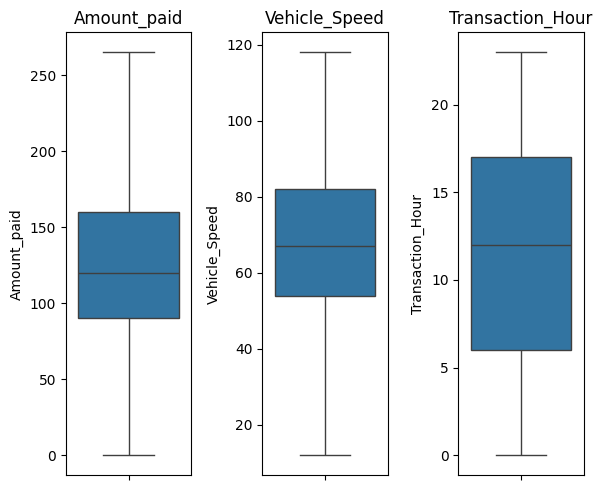

In [127]:
# box plot to identify outliers
plt.figure(figsize = (8,5))
numeric_columns = df1.select_dtypes(include = 'number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(1,4,i+1)
    sns.boxplot(y = df1[col])
    plt.title(col)
plt.tight_layout()
plt.show


##### <span style='color:red'>All Outliers are removed

#### <span style='color:green'> Check the skewness and kurtosis after outlier treatment

In [170]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)
print("====================================================================================")

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)
print("====================================================================================")

Amount_paid         0.304804
Vehicle_Speed       0.005971
Transaction_Hour   -0.001011
dtype: float64
Amount_paid         2.250681
Vehicle_Speed       2.148523
Transaction_Hour    1.828696
dtype: float64
variable with positive skewness (skew > 1):
 Series([], dtype: float64)
variable with negative skewness (skew < -1):
 Series([], dtype: float64)
variables with platykurtic distribution (kurtosis < 3):
 Amount_paid         2.250681
Vehicle_Speed       2.148523
Transaction_Hour    1.828696
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 Series([], dtype: float64)


The numerical features are relatively symmetrical, with no significant skewness (absolute value > 1). All numerical features have kurtosis values less than 3, indicating platykurtic distributions. This means the distributions have lighter tails and flatter peaks compared to a normal distribution.

The absence of significant skewness and the presence of platykurtic distributions suggest that the numerical features are now more balanced and well-suited for further analysis and model building. This preprocessing step has improved the quality of the data, leading to more reliable and robust predictive models.

## <span style='color:blue'>7. Visualization <a id='visualization'></a>

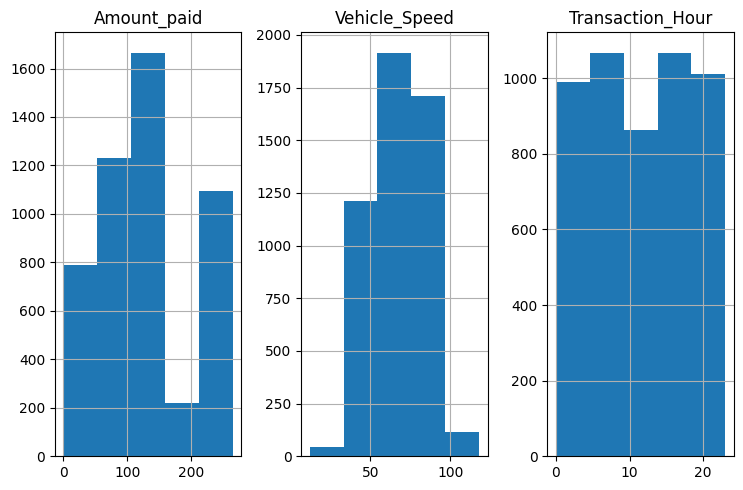

In [129]:
# Histograms for numerical columns after outlier treatment
df1[numeric_columns].hist(bins= 5, figsize=(10,5), layout=(1,4))
plt.tight_layout()
plt.show()

The histograms show 'Amount_paid' has a bimodal distribution with common values around the lower and mid-ranges. 'Vehicle_Speed' is left-skewed, mostly between 40-90. 'Transaction_Hour' has peaks at 0-5 and 18-23, indicating high activity during late-night and early-morning hours.

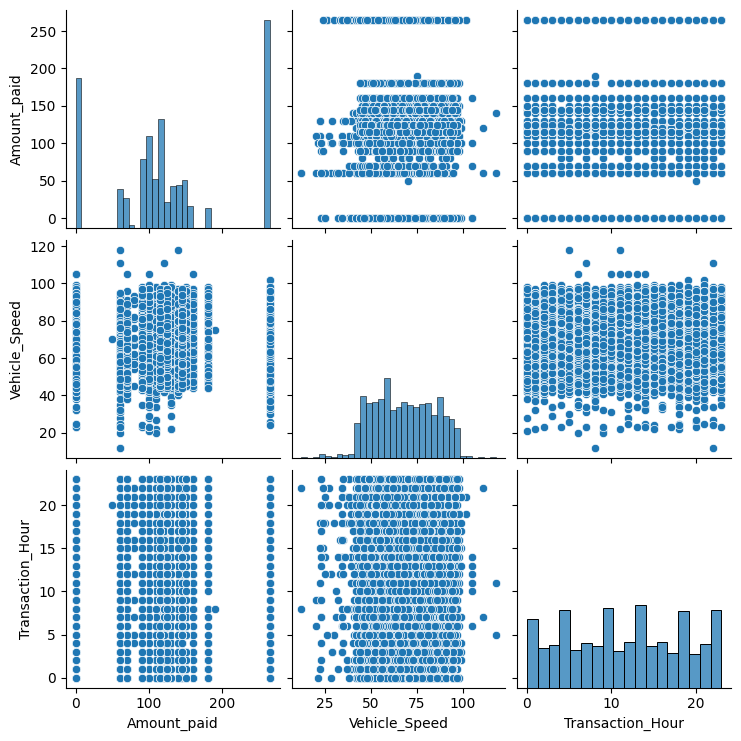

In [130]:
# pairplot - To visualize relationship between multiple pairs of variables
sns.pairplot(df1)

The pair plot shows 'Amount_paid' is bimodal, 'Vehicle_Speed' is left-skewed, and 'Transaction_Hour' is uniform. Scatter plots indicate no strong linear relationships between the variables, but higher speeds tend to correspond with mid-range payments. 'Transaction_Hour' shows a spread distribution with no clear patterns with other variables.

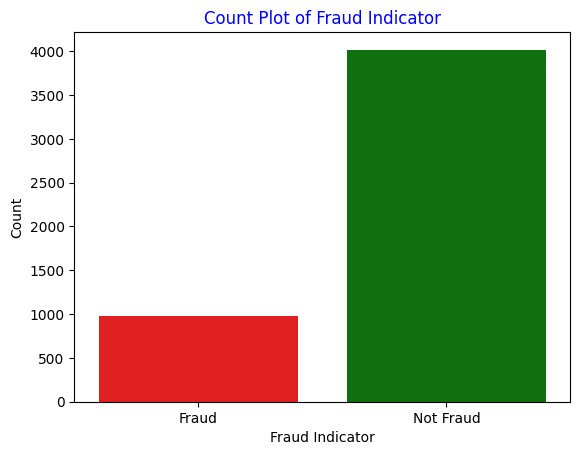

In [131]:
sns.countplot(data=df,x='Fraud_indicator',palette=['red','green'])
plt.title('Count Plot of Fraud Indicator',color='blue')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

The count plot shows that there are significantly more non-fraudulent transactions (about 4000) compared to fraudulent ones (about 1000). This indicates that fraud is relatively infrequent in the dataset.

<Axes: xlabel='count', ylabel='Vehicle_Type'>

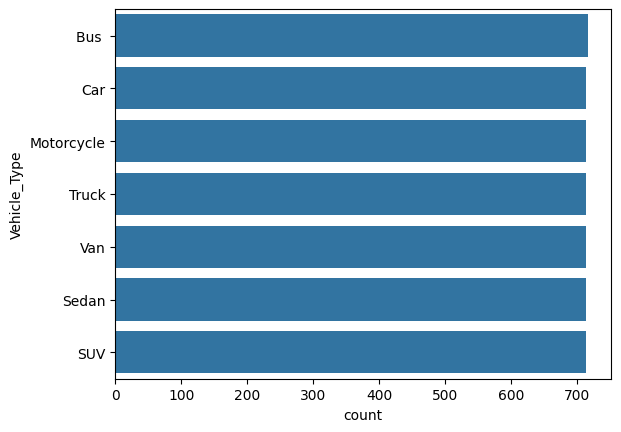

In [132]:
sns.countplot(df1['Vehicle_Type'])

In [133]:
df1['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

The dataset has a balanced representation of vehicle types, with each category (Bus, Car, Motorcycle, Truck, Van, Sedan, SUV) having approximately 714-716 entries.

<Axes: xlabel='count', ylabel='Lane_Type'>

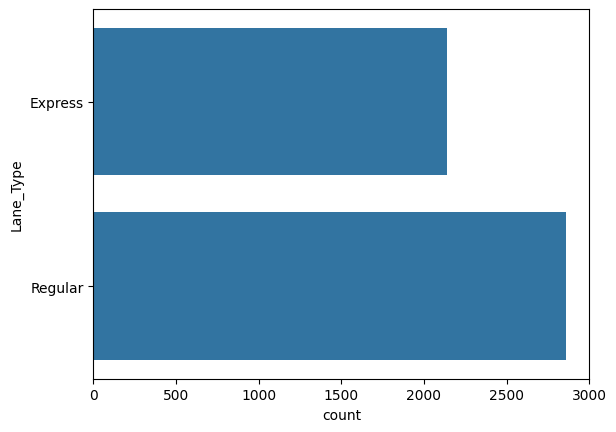

In [134]:
sns.countplot(df1['Lane_Type'])

The count plot reveals that the 'Lane_Type' shows express lanes are the road less traveled, with about 2200 instances, compared to the bustling regular lanes with around 2900 instances.

<Axes: xlabel='count', ylabel='Vehicle_Dimensions'>

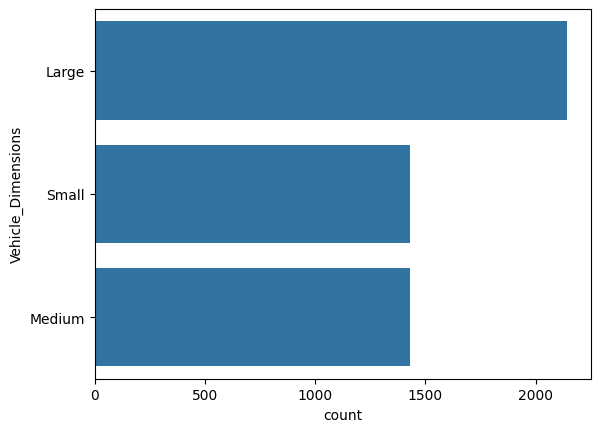

In [135]:
sns.countplot(df1['Vehicle_Dimensions'])

The count plot for 'Vehicle_Dimensions' reveals that large vehicles are the most common, with a count of 2200, significantly higher than the small and medium vehicles, which both have counts of 1400 each. This indicates a notable preference or prevalence of large vehicles in the dataset, while small and medium vehicles are equally represented

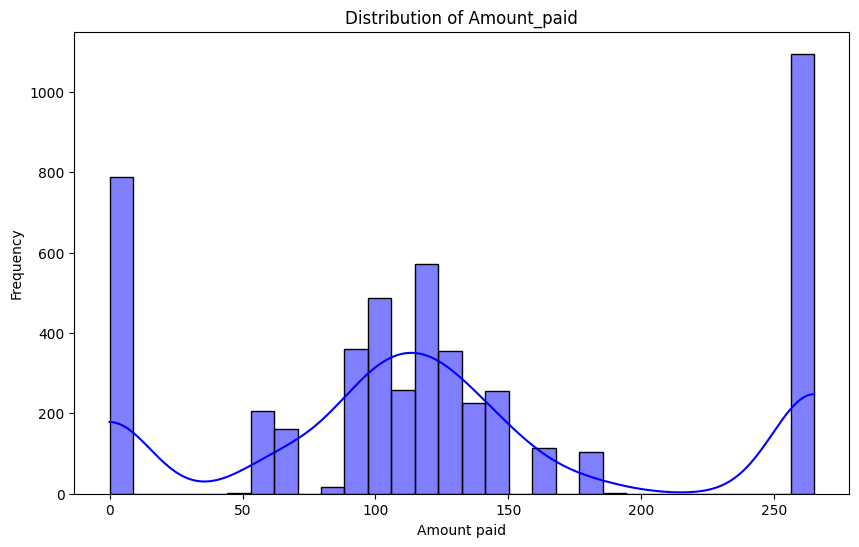

In [136]:
# Visualize the distribution of Amount using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['Amount_paid'], bins=30, kde=True, color='blue')
plt.title('Distribution of Amount_paid')
plt.xlabel('Amount paid')
plt.ylabel('Frequency')
plt.show()

The histogram of 'Amount_paid' shows a bimodal distribution with peaks around the lowest and highest values. There's a significant frequency of small payments around 0 and a large spike at the maximum payment amount (250), with smaller, varying frequencies in between. This indicates two common payment scenarios: very low and very high amounts, with less frequent mid-range payments.

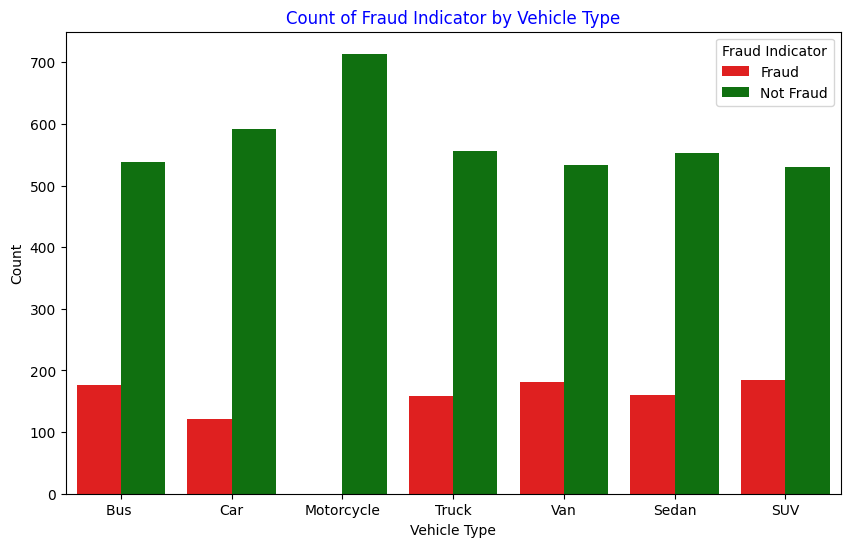

In [137]:
# Barplot - Compare fraud indicator counts for vehicle types
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Vehicle_Type', hue='Fraud_indicator',palette=('red','green'))
plt.title('Count of Fraud Indicator by Vehicle Type',color='blue')
plt.ylabel('Count')
plt.xlabel('Vehicle Type')
plt.legend(title='Fraud Indicator')
plt.show()

The bar plot comparing fraud indicators across vehicle types reveals that motorcycles have no fraud cases, while cars, buses, trucks, vans, sedans, and SUVs show low incidences of fraud, typically below 200 cases, with non-fraudulent cases consistently higher, around or above 500. This pattern suggests varying levels of susceptibility to fraud across different vehicle categories, with motorcycles notably less affected compared to other vehicle types.

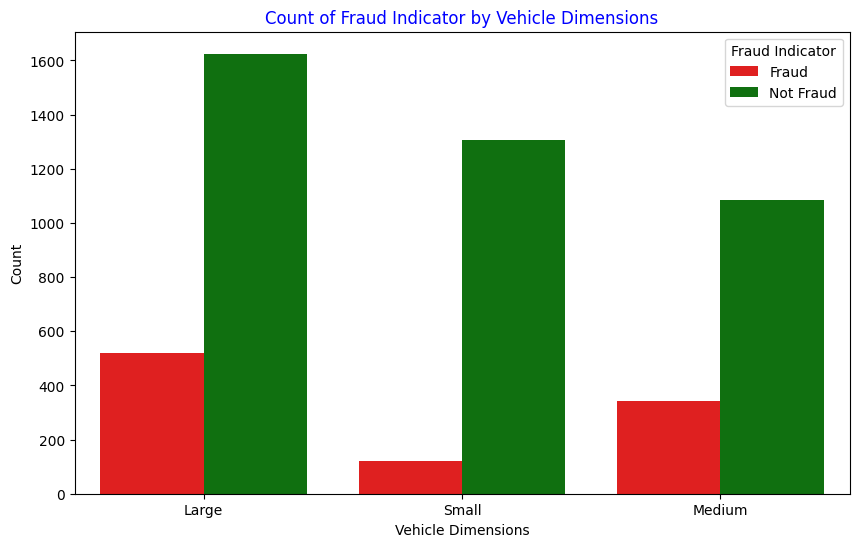

In [138]:
# Barplot - Compare fraud indicator counts for vehicle dimensions
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='Vehicle_Dimensions', hue='Fraud_indicator',palette=('red','green'))
plt.title('Count of Fraud Indicator by Vehicle Dimensions',color='blue')
plt.ylabel('Count')
plt.xlabel('Vehicle Dimensions')
plt.legend(title='Fraud Indicator')
plt.show()

From the bar plot, it is clear that almost all vehicle types have fraud counts between 100 and 200, and there is fraud in motorcycles as well. Regarding vehicle dimensions, large vehicles have the most fraud, followed by medium vehicles, while small vehicles have fewer than 200 fraud cases.

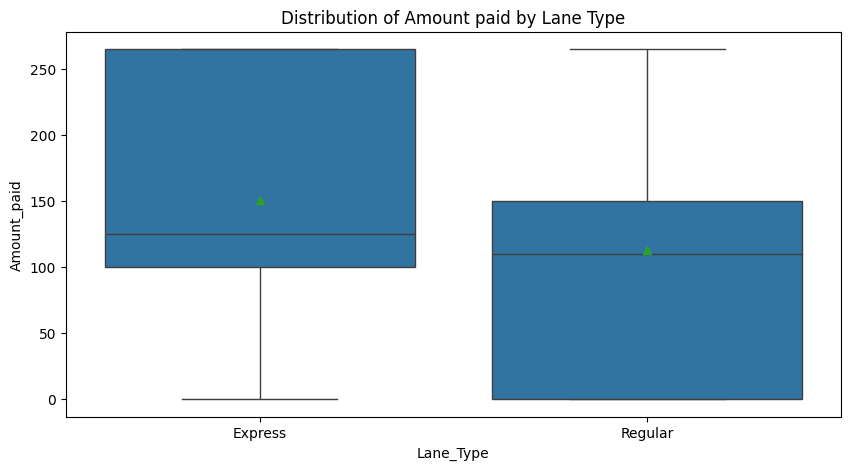

In [139]:
# Boxplot of amount paid by lane type
plt.figure(figsize=(10,5))
sns.boxplot(x="Lane_Type", y="Amount_paid", showmeans=True, data=df1)
plt.title("Distribution of Amount paid by Lane Type")
plt.show()

The boxplot shows that the distribution of 'Amount_paid' for both 'Lane_Type' categories, Express and Regular, is quite similar with median values around 125-150. However, the Express lane exhibits a slightly higher range and variability in payments, while the Regular lane has a more consistent payment distribution with fewer extreme values. Both lane types have similar mean values, indicated by the green triangles.

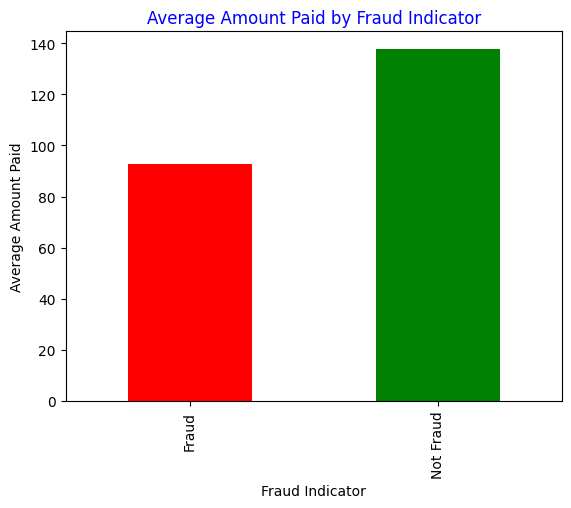

In [140]:
# Barplot - Compare mean amount paid for fraud indicator
mean_amount_paid = df1.groupby('Fraud_indicator')['Amount_paid'].mean()

# Plotting
mean_amount_paid.plot(kind='bar', color=['red', 'green'])
plt.title('Average Amount Paid by Fraud Indicator',color = 'blue')
plt.ylabel('Average Amount Paid')
plt.xlabel('Fraud Indicator')
plt.show()

The bar plot comparing the average amount paid based on fraud indicators indicates that fraudulent transactions have a notably lower average amount paid, approximately below 100 units, compared to non-fraudulent transactions, which average around 140 units. This suggests that fraudulent cases tend to involve smaller financial amounts compared to non-fraudulent transactions within the dataset.

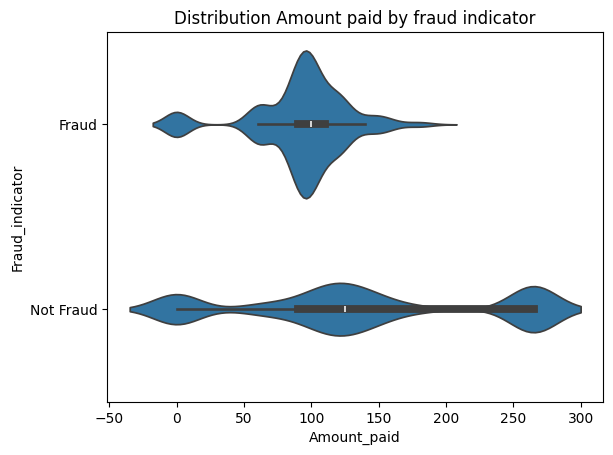

In [141]:
# violinplot - Visualize the distribution Amount paid by fraud indicator.
sns.violinplot(data=df1, x='Amount_paid', y='Fraud_indicator')
plt.title('Distribution Amount paid by fraud indicator')
plt.show()

The violin plot shows:
- **Fraudlent Transactions**:
  * A wider range of Amount paid values.
  * More variations with noticeable peaks and outliers.
- **Non-Fraudlent Transactions**:
  * A narrower, more consistent range of Amount paid.
  * Less variation and fewer extreme values.
 
Fraudlent transactions generally show more variability in the amount paid compared to non-fraudlent ones.

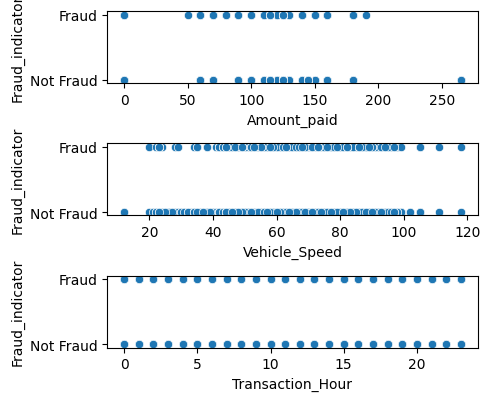

In [142]:
# scatter plot to identify the relationship between dependent (Fraud_indicator) and the independent variables
plt.figure(figsize=(5,5))
for i, col in enumerate(numeric_columns):
    plt.subplot(4,1, i+1)
    sns.scatterplot(data=df1,x=col,y='Fraud_indicator')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

The scatter plots show that fraudulent transactions are dispersed across all values of 'Amount_paid', 'Vehicle_Speed', and 'Transaction_Hour', with no distinct patterns distinguishing them from non-fraudulent transactions. This suggests that fraud occurs across a wide range of transaction amounts, vehicle speeds, and times, making it difficult to predict fraud based on these individual variables alone.

<Axes: >

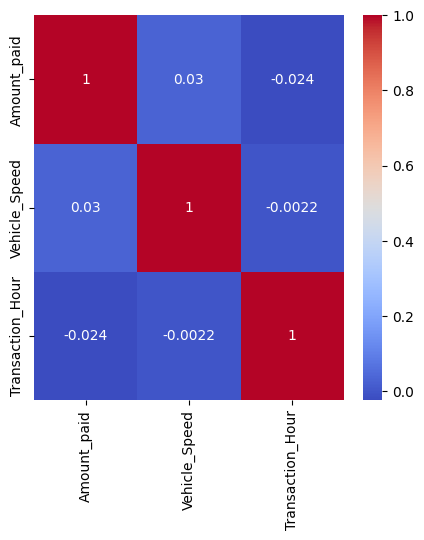

In [143]:
plt.figure(figsize=(5,5))
sns.heatmap(df1[numeric_columns].corr(),annot=True, cmap = 'coolwarm')

The heatmap reveals that 'Amount_paid' correlates  minimal with 'Vehicle_Speed' (0.03) and 'Transaction_Hour' (-0.024). 'Vehicle_Speed' and 'Transaction_Hour' exhibit negligible correlation (-0.0022). This indicates that in the dataset, 'Amount_paid' is largely independent of both vehicle speed and transaction hour, which have very weak relationships overall.

## <span style='color:blue'>8. Feature Engineering <a id='feature-engineering'></a>

#### Encode categorical features to numerical values using techniques like one-hot encoding for nominal data. For the target variable 'Fraud_indicator', use label encoding to convert it into numerical labels. This prepares the data for machine learning algorithms..

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle_Type        5000 non-null   object 
 1   TollBoothID         5000 non-null   object 
 2   Lane_Type           5000 non-null   object 
 3   Vehicle_Dimensions  5000 non-null   object 
 4   Amount_paid         5000 non-null   float64
 5   Vehicle_Speed       5000 non-null   float64
 6   Fraud_indicator     5000 non-null   object 
 7   Transaction_Hour    5000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 312.6+ KB


In [145]:
df1.shape

(5000, 8)

In [146]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable
label_encoder = LabelEncoder()
df1['Fraud_indicator'] = label_encoder.fit_transform(df1['Fraud_indicator'])

# One hot encode the categorical features (excluding the target variable)
categorical_features = df1.select_dtypes(include=['object']).columns
df1_encoded  = pd.get_dummies(df1, columns = categorical_features, drop_first = True)

df1.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Amount_paid,Vehicle_Speed,Fraud_indicator,Transaction_Hour
0,Bus,A-101,Express,Large,120.0,65.0,0,11.0
1,Car,B-102,Regular,Small,100.0,78.0,0,14.0
2,Motorcycle,D-104,Regular,Small,0.0,53.0,1,18.0
3,Truck,C-103,Regular,Large,120.0,92.0,0,2.0
4,Van,B-102,Express,Medium,100.0,60.0,0,6.0


In [147]:
# split the data into features (x) and target (y)
x = df1_encoded.drop('Fraud_indicator', axis = 1)
y = df1_encoded['Fraud_indicator']

x.head()

,Amount_paid,Vehicle_Speed,Transaction_Hour,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,120.0,65.0,11.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,100.0,78.0,14.0,True,False,False,False,False,False,True,False,False,False,False,True,False,True
2,0.0,53.0,18.0,False,True,False,False,False,False,False,False,True,False,False,True,False,True
3,120.0,92.0,2.0,False,False,False,False,True,False,False,True,False,False,False,True,False,False
4,100.0,60.0,6.0,False,False,False,False,False,True,True,False,False,False,False,False,True,False


In [148]:
x.shape

(5000, 17)

In [149]:
# Scale the numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the result back to a DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Amount_paid,Vehicle_Speed,Transaction_Hour,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_B-102,TollBoothID_C-103,TollBoothID_D-104,TollBoothID_D-105,TollBoothID_D-106,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small
0,-0.104160,-0.171878,-0.081094,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,-0.633518,-0.631659,-0.089803,-0.145746,-0.358703,-1.155105,-0.632278,-0.632278
1,-0.338017,0.611578,0.358998,2.450061,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,1.578487,-0.631659,-0.089803,-0.145746,-0.358703,0.865722,-0.632278,1.581582
2,-1.507304,-0.895068,0.945789,-0.408153,2.450061,-0.408153,-0.408153,-0.408153,-0.408153,-0.633518,-0.631659,11.135529,-0.145746,-0.358703,0.865722,-0.632278,1.581582
3,-0.104160,1.455300,-1.401373,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.633518,1.583133,-0.089803,-0.145746,-0.358703,0.865722,-0.632278,-0.632278
4,-0.338017,-0.473207,-0.814582,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,1.578487,-0.631659,-0.089803,-0.145746,-0.358703,-1.155105,1.581582,-0.632278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.591306,0.792375,1.532579,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.633518,1.583133,-0.089803,-0.145746,-0.358703,0.865722,-0.632278,-0.632278
4996,-0.045696,-0.232144,0.212301,-0.408153,-0.408153,-0.408153,-0.408153,-0.408153,2.450061,1.578487,-0.631659,-0.089803,-0.145746,-0.358703,-1.155105,1.581582,-0.632278
4997,-0.162624,1.515566,-0.961280,-0.408153,-0.408153,-0.408153,2.450061,-0.408153,-0.408153,-0.633518,-0.631659,-0.089803,-0.145746,-0.358703,0.865722,1.581582,-0.632278
4998,0.188162,-0.654005,1.239184,-0.408153,-0.408153,2.450061,-0.408153,-0.408153,-0.408153,1.578487,-0.631659,-0.089803,-0.145746,-0.358703,-1.155105,-0.632278,-0.632278


## <span style='color:blue'>9. Data Splitting <a id='data-splitting'></a>

In [150]:
# Splitting the dataset into 80-20 that is , 80% of the data is for training and 20% of the data is for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

## <span style='color:blue'>10. Model Selection <a id='model-selection'></a>

### Models Selected: LogisticRegression, Random Forest, Decision Tree, Naive Bayes, SVC

## <span style='color:blue'>11. Model Training & Evaluation <a id='model-training&evaluation'></a>

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to hold the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42)
}

# Lists to store the evaluation metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    model_names.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred))
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("\n")

# Summarize the evaluation metrics for all models in a DataFrame
results_df1 = pd.DataFrame({
    'Model-Name': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Check column names to ensure they are correct
print(results_df1.columns)

Model: Logistic Regression
Accuracy: 0.955
Precision: 0.9456521739130435
Recall: 1.0
F1 Score: 0.9720670391061452
ROC AUC Score: 0.8963133640552996


Model: Random Forest
Accuracy: 0.97
Precision: 0.9700374531835206
Recall: 0.9923371647509579
F1 Score: 0.9810606060606061
ROC AUC Score: 0.940869043204972


Model: Decision Tree
Accuracy: 0.961
Precision: 0.9818652849740933
Recall: 0.9680715197956578
F1 Score: 0.97491961414791
ROC AUC Score: 0.9517776953817


Model: Naive Bayes
Accuracy: 0.361
Precision: 1.0
Recall: 0.1839080459770115
F1 Score: 0.3106796116504854
ROC AUC Score: 0.5919540229885057


Model: SVC
Accuracy: 0.935
Precision: 0.9233490566037735
Recall: 1.0
F1 Score: 0.9601471489883507
ROC AUC Score: 0.8502304147465438


Index(['Model-Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], dtype='object')


In [152]:
results_df1 = pd.DataFrame({"Model-Name":model_names, "Accuracy": accuracies, "Precision":precisions, "Recall":recalls, "F1 Score ":f1_scores,'ROC AUC':roc_aucs})
results_df1 = results_df1.set_index('Model-Name')
results_df1.sort_values("Accuracy", ascending = False)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model-Name,,,,,
Random Forest,0.970,0.970037,0.992337,0.981061,0.940869
Decision Tree,0.961,0.981865,0.968072,0.974920,0.951778
Logistic Regression,0.955,0.945652,1.000000,0.972067,0.896313
SVC,0.935,0.923349,1.000000,0.960147,0.850230
Naive Bayes,0.361,1.000000,0.183908,0.310680,0.591954


- **Random Forest** and **Decision Tree** are the top performers with high accuracy, precision, recall, and F1 scores, making them excellent choices for fraud detection in this dataset.

-  **Logistic Regression** also performs well, especially with a perfect recall score, indicating it correctly identified all positive cases.

-  **SVC** shows good performance but slightly lower than Random Forest and Decision Tree.

-  **Naive Bayes** has the lowest performance, especially in recall, indicating it misses a significant number of positive cases.

## <span style='color:blue'>12. Feature Selection <a id='feature-selection'></a>

### <span style='color:green'> 1.Feature Importance from Tree-Based Models

Tree-based models such as Random Forests can provide a measure of feature importance directly.

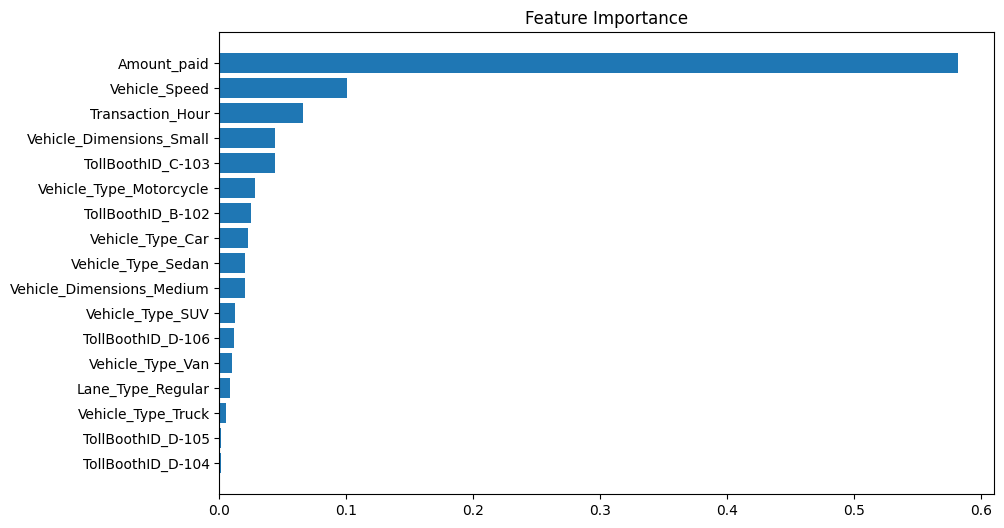

In [153]:
from sklearn.ensemble import RandomForestClassifier

# Fit the model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x,y)

# Get feature importances
importances = rf.feature_importances_
feature_names = x.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importances = feature_importances.sort_values(by = 'Importance', ascending = False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.show()

The feature importance plot from the Random Forest model highlights that 'Amount_paid' is the most significant predictor with an importance score of around 0.6. It is followed by 'Vehicle_Speed' at 0.1, and then 'Transaction_Hour' and 'Vehicle_Dimension_Small' with lower importance scores. This indicates that 'Amount_paid' is the most critical feature for predicting fraud in this dataset.

### <span style='color:green'> 2.Recursive Feature Elimination(RFE)

RFE works by recursively removing the least important features and building the model on those features that remain.

In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression()

# Create the RFE model and select the top 15 features
rfe = RFE(model, n_features_to_select = 15)
fit = rfe.fit(x,y)

# Get the selected features
selected_features = x.columns[fit.support_]

print('Selected Features:', selected_features)

Selected Features: Index(['Amount_paid', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan', 'Vehicle_Type_Truck',
       'Vehicle_Type_Van', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Lane_Type_Regular', 'Vehicle_Dimensions_Medium',
       'Vehicle_Dimensions_Small'],
      dtype='object')


The Recursive Feature Elimination (RFE) with Logistic Regression selected 'Amount_paid' along with various vehicle types (Car, Motorcycle, SUV, Sedan, Truck, Van), specific TollBooth IDs (B-102, C-103, D-104, D-105, D-106), 'Lane_Type_Regular', and vehicle dimensions (Medium, Small) as the top 15 features. This selection indicates that these features are the most influential in predicting the target variable.

### <span style='color:green'> 3.SelectKBest with Chi-Sqaured Test

This method can be used for classification tasks and selects the top k features that have the highest chi-squared statistics with respect to the target variable.

In [155]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(x, y)

# Get the scores and feature names
df1scores = pd.DataFrame(fit.scores_, columns=["Score"])
df1columns = pd.DataFrame(x.columns, columns=["Feature"])

# Concat two dataframes for better visualization
feature_scores = pd.concat([df1columns, df1scores], axis=1)

# Print the best features
print(feature_scores.nlargest(10, 'Score'))

                      Feature         Score
0                 Amount_paid  12348.894444
4     Vehicle_Type_Motorcycle    174.722928
13          TollBoothID_D-106    139.484690
16   Vehicle_Dimensions_Small    111.726313
9           TollBoothID_B-102     32.296604
12          TollBoothID_D-105     25.449838
5            Vehicle_Type_SUV     16.877538
15  Vehicle_Dimensions_Medium     16.635750
8            Vehicle_Type_Van     14.636215
10          TollBoothID_C-103     12.306526


The SelectKBest method using the chi-squared statistic identified 'Amount_paid' as the most significant feature with a score of 12348.89. Other top features include 'Vehicle_Type_Motorcycle', 'TollBoothID_D-106', and 'Vehicle_Dimensions_Small', among others, indicating their strong relevance in the dataset for predicting the target variable. This highlights that transaction amounts and specific vehicle types and toll booth IDs are crucial for analysis.

### <span style='color:green'> 4.Lasso Regularization(L1 Penalty)

Lasso can be used to perform feature selection as it can shrink some coefficients to zero, effectively removing those features.

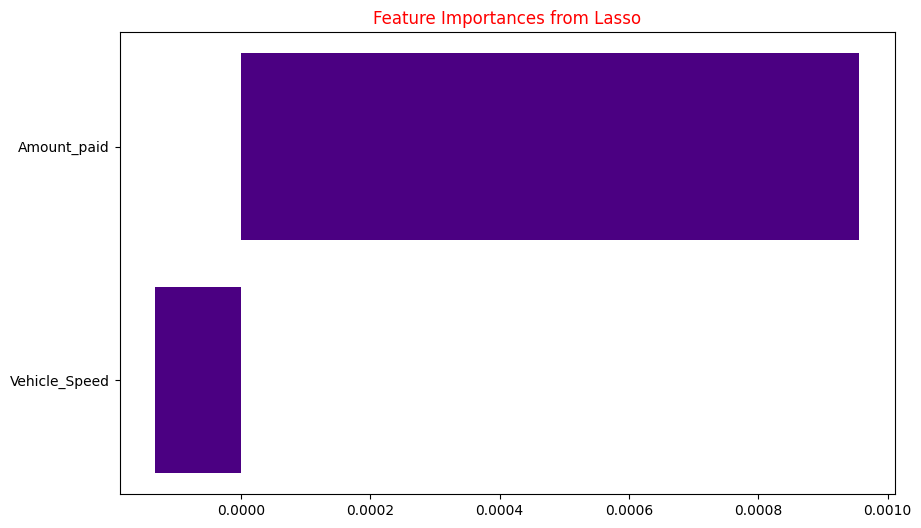

In [156]:
from sklearn.linear_model import Lasso

# Fit the model
lasso = Lasso(alpha = 0.1)
lasso.fit(x,y)

# Get the coefficients
coefs = lasso.coef_

# Create a DataFrame for better visualization
feature_coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefs})
feature_coefs = feature_coefs[feature_coefs['Coefficient'] !=0]
feature_coefs = feature_coefs.sort_values(by = 'Coefficient', ascending = False)

# Plot feature importances
plt.figure(figsize = (10,6))
plt.title('Feature Importances from Lasso',color='red')
plt.barh(feature_coefs['Feature'], feature_coefs['Coefficient'],color='indigo')
plt.gca().invert_yaxis()
plt.show()

 The feature 'Amount_paid' has the highest positive importance. It suggests that 'Amount_Paid' are significantly associated with the target variable (Fraud_indicator).

### <span style='color:green'> 5. Correlation Matrix with Heatmap

A correlation matrix can help you identify features that are highly correlated with the target variable and with each other.

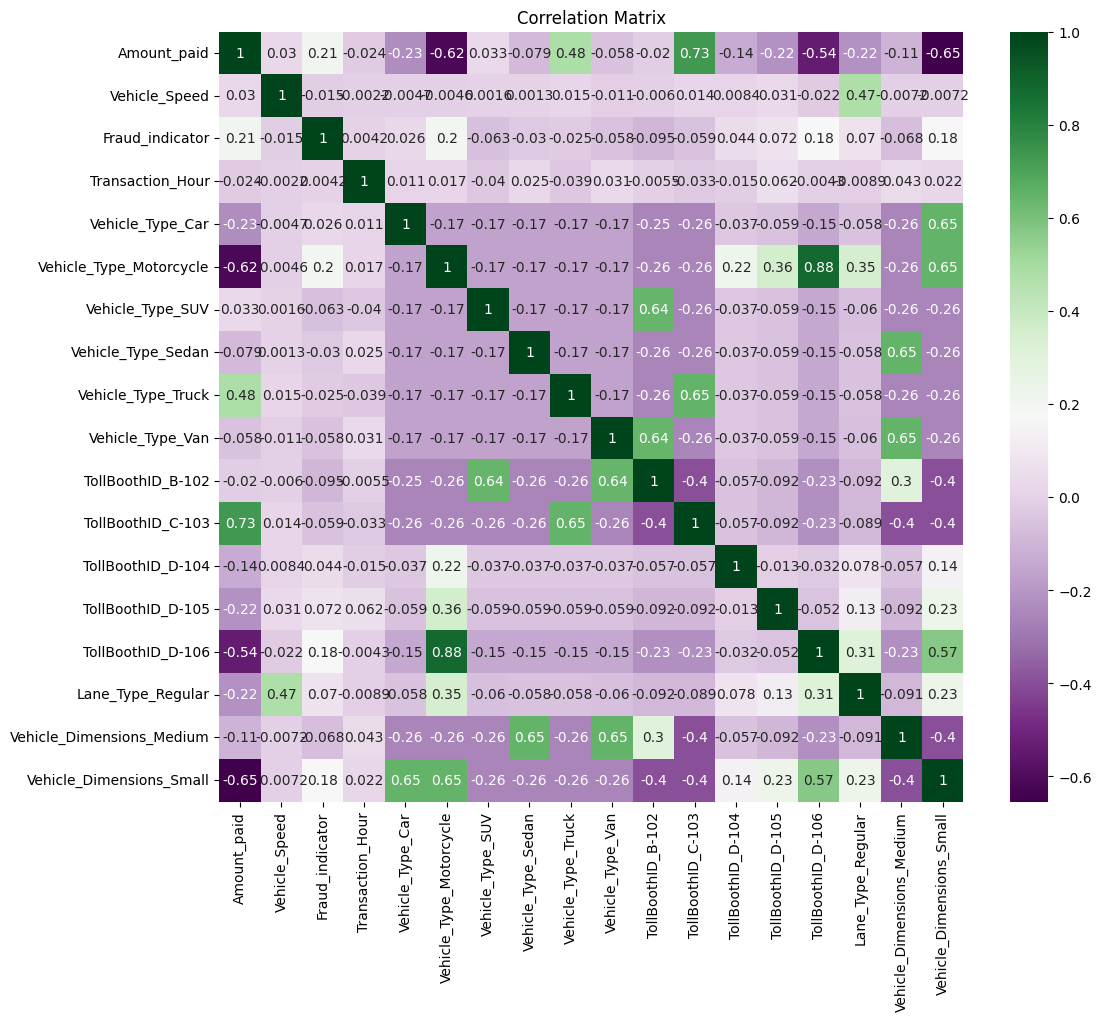

Fraud_indicator              1.000000
Amount_paid                  0.208636
Vehicle_Type_Motorcycle      0.201906
TollBoothID_D-106            0.177444
Vehicle_Dimensions_Small     0.176857
TollBoothID_D-105            0.072098
Lane_Type_Regular            0.070051
TollBoothID_D-104            0.044424
Vehicle_Type_Car             0.026426
Transaction_Hour             0.004164
Vehicle_Speed               -0.014572
Vehicle_Type_Truck          -0.025355
Vehicle_Type_Sedan          -0.029670
Vehicle_Type_Van            -0.058437
TollBoothID_C-103           -0.058680
Vehicle_Type_SUV            -0.062752
Vehicle_Dimensions_Medium   -0.068244
TollBoothID_B-102           -0.095141
Name: Fraud_indicator, dtype: float64


In [157]:
# Calculate the correlation Matrix
corr = df1_encoded.corr()

# Plot the heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot =True, cmap = 'PRGn')
plt.title('Correlation Matrix')
plt.show()

# Identify features with high correlation to the target variable
target_corr = corr['Fraud_indicator'].sort_values(ascending = False)
print(target_corr)

Motorcycles often use tollbooth C-103. SUVs and trucks are frequently associated. Motorcycles and cars generally pay less in tolls. Transaction time and vehicle type have weak correlations with fraud. Prioritize features like 'Vehicle_Type_Motorcycle', 'Amount_paid' and specific tollbooth IDs due to their significant impact.

**Across multiple analytical methods, 'Amount_paid' consistently stands out as the most significant predictor of fraud in the dataset. This feature's importance is underscored by its high scores in Random Forest, Recursive Feature Elimination with Logistic Regression, and SelectKBest using chi-squared statistic. Additionally, specific vehicle types and TollBooth IDs also play crucial roles in predicting fraud, reflecting their substantial impact on transaction outcomes at tollbooths.**

## <span style='color:blue'>13. Model Evaluation <a id='model-evaluation'></a>

Model: Logistic Regression
Accuracy: 0.945
Precision: 0.9354066985645934
Recall: 0.9987228607918263
F1 Score: 0.9660284126003706
ROC AUC Score: 0.9576749003890273


Model: Random Forest
Accuracy: 0.957
Precision: 0.9659949622166247
Recall: 0.979565772669221
F1 Score: 0.9727330374128091
ROC AUC Score: 0.9824172655095903


Model: Decision Tree
Accuracy: 0.937
Precision: 0.9699738903394256
Recall: 0.9489144316730523
F1 Score: 0.9593285990961911
ROC AUC Score: 0.9231744854659204


Model: Naive Bayes
Accuracy: 0.576
Precision: 0.9761273209549072
Recall: 0.46998722860791825
F1 Score: 0.6344827586206897
ROC AUC Score: 0.8592233581110112


Model: SVC
Accuracy: 0.783
Precision: 0.783
Recall: 1.0
F1 Score: 0.8782950084127874
ROC AUC Score: 0.9291658574194726




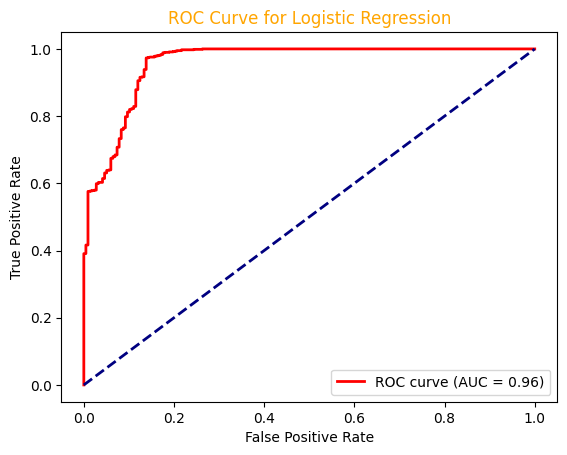

ROC curve for Logistic Regression plotted successfully.


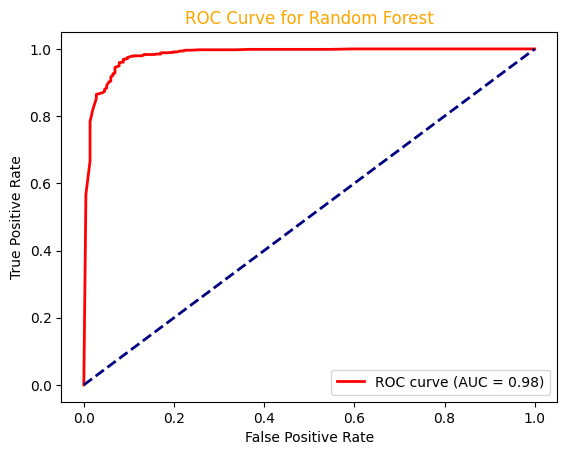

ROC curve for Random Forest plotted successfully.


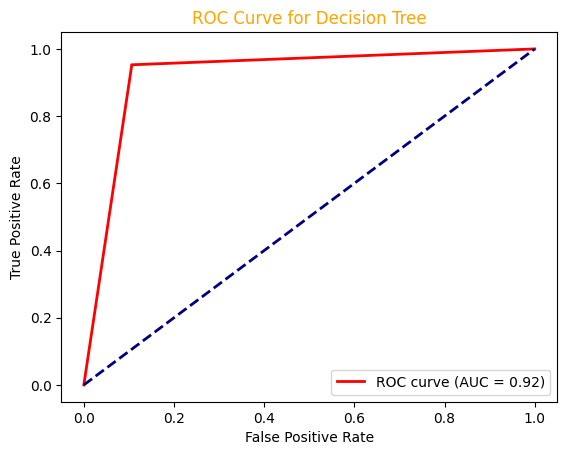

ROC curve for Decision Tree plotted successfully.


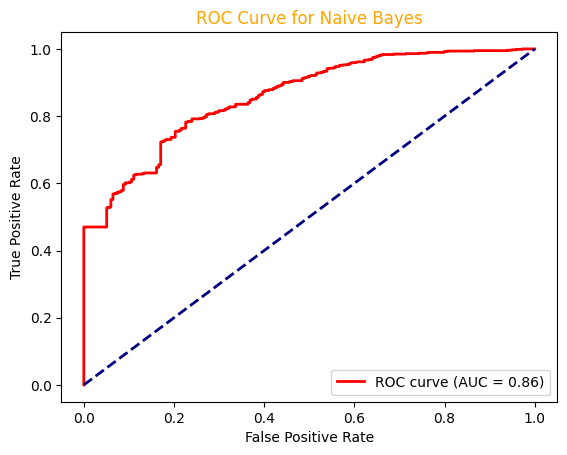

ROC curve for Naive Bayes plotted successfully.


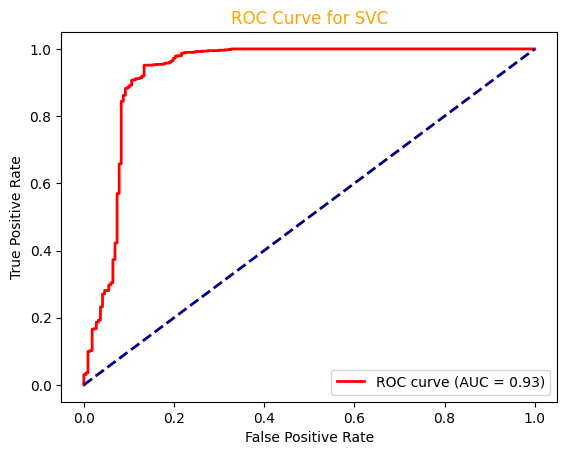

ROC curve for SVC plotted successfully.


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Assuming 'x' and 'df1' are your dataframes
selected_features = ['Vehicle_Type_Motorcycle', 'Vehicle_Dimensions_Small', 'Vehicle_Dimensions_Medium',
                     'Amount_paid', 'Transaction_Hour', 'Vehicle_Speed', 'TollBoothID_C-103']

X = x[selected_features]
y = df1['Fraud_indicator']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to be trained
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42),
}

# Training and evaluation
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_pred_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
    print("\n")

# Plotting ROC curves for each model
for model_name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}',color = 'orange')
        plt.legend(loc="lower right")
        plt.show()
        print(f"ROC curve for {model_name} plotted successfully.")
    else:
        print(f"{model_name} does not support predict_proba for ROC curve")


In [159]:
results_df1 = pd.DataFrame({"Model-Name":model_names, "Accuracy": accuracies, "Precision":precisions, "Recall":recalls, "F1 Score ":f1_scores,'ROC AUC':roc_aucs})
results_df1 = results_df1.set_index('Model-Name')
results_df1.sort_values("Accuracy", ascending = False)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model-Name,,,,,
Random Forest,0.970,0.970037,0.992337,0.981061,0.940869
Decision Tree,0.961,0.981865,0.968072,0.974920,0.951778
Logistic Regression,0.955,0.945652,1.000000,0.972067,0.896313
SVC,0.935,0.923349,1.000000,0.960147,0.850230
Naive Bayes,0.361,1.000000,0.183908,0.310680,0.591954


## <span style='color:blue'> 14. Hyperparameter Tuning <a id='hyperparameter-tuning'></a>

In [160]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grids

# Logistic Regression
param_grid_lr ={
    'penalty':['l1','l2'],
    'C':[0.01, 0.1, 1, 10],
    'solver':['liblinear']
}

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True, False]
}

# Decision Tree
param_grid_dt = {
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
}

# Naive Bayes(no hyperparameter to tune for GaussianNB)

#SVC
param_grid_svc = {
    'C':[0.1, 1, 10],
    'gamma':[1, 0.1, 0.01],
    'kernel':['linear', 'rbf']
}

In [161]:
# Initialize models with default parameter

models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'Naive Bayes': (GaussianNB(), None),
    'SVC': (SVC(probability=True, random_state=42), param_grid_svc),
}

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to hold the best models
best_models = {}

# Lists to store the evaluation metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for model_name, (model, param_grid) in models.items():
    if param_grid is not None:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        # For models without hyperparameters to tune (like Naive Bayes)
        model.fit(x_train, y_train)
        best_model = model
        best_models[model_name] = best_model
    
    y_pred = best_model.predict(x_test)
    
    model_names.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred))
    
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("\n")

# Summarize the evaluation metrics for all models in a DataFrame
results_df = pd.DataFrame({
    'Model-Name': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

results_df.set_index('Model-Name', inplace=True)
print(results_df.sort_values(by='F1 Score', ascending=False))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Model: Logistic Regression
Accuracy: 0.951
Precision: 0.9453883495145631
Recall: 0.9948914431673053
F1 Score: 0.9695084007467331
ROC AUC Score: 0.8937590856389521


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: Random Forest
Accuracy: 0.963
Precision: 0.9650872817955112
Recall: 0.9885057471264368
F1 Score: 0.9766561514195583
ROC AUC Score: 0.9297367445309603


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: Decision Tree
Accuracy: 0.954
Precision: 0.9670468948035488
Recall: 0.9744572158365262
F1 Score: 0.9707379134860051
ROC AUC Score: 0.927320773816880

## <span style='color:blue'>15. Result <a id='result'></a>

**RandomForestClassifier** has the highest accuracy (0.963), F1 Score (0.977), and ROC AUC score (0.930), making it the best overall model for this task. This model strikes a good balance between precision (0.965) and recall (0.989), which means it correctly identifies most fraudulent transactions while maintaining a high level of precision.

## <span style='color:blue'>16. Model Deployment <a id='model-deployment'></a>

### <span style='color:green'> Save the Model

In [163]:
import joblib

# 'best_models['Random Forest']' contains your trained Random Forest model
best_model = best_models['Random Forest']

# Define the filename to save the model
filename = 'random_forest_model.joblib'

# Save the model using joblib
joblib.dump(best_model, filename)

print("Model saved successfully.")


import os

# Check if the model file exists
if os.path.isfile('random_forest_model.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

import joblib

# Define the filename to load the model from
filename = 'random_forest_model.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model saved successfully.
Model file exists.
Model loaded successfully.


### <span style='color:green'> Test with unseen data

In [168]:
# Assuming new_data is your new unseen data array
new_data = np.random.rand(10,7) #Example of 10 new samples with 7 features each

# Predict on unseen data
predictions = best_model.predict(new_data)
print('Predictions on unseen data:', predictions)

Predictions on unseen data: [0 0 1 0 0 0 1 0 0 0]


## <span style='color:blue'>17. Limitations<a id='limitations'></a>

1. **Lack of Fraud Detection:** Traditional systems focus solely on toll collection, lacking mechanisms for detecting fraudulent activities.

2. **Undetected Frauds:** Many fraudulent activities go unnoticed by authorities.

3. **Absence of Historical Fraud Detection Methods:** No previous systems were employed to detect toll fraud.

4. **Incorrect Vehicle Type Detection:** The system struggles to accurately detect vehicle types based on the Fastag, leading to incorrect toll charges.

5. **Payment Discrepancies:** Incorrect vehicle detection results in incorrect toll amounts being charged.

6. **RFID(Radio Frequency Identification) Issues:** Early implementations faced problems with RFID readers, which frequently malfunctioned, and handheld devices also experienced faults.

7. **Server Reliability:** The automated electronic deduction system is vulnerable to server failures, which can halt operations.

8. **Ownership and Fastag Transfer:** When a vehicle is sold, it is unclear if the new owner can use the existing Fastag linked to the previous owner's registration and bank details.

9. **Fastag Security:** Fastags, being physical tags, are prone to theft or loss, necessitating immediate notification to authorities for account blocking.

10. **Incorrect Charges:** Technical issues have led to instances of double charging.

## <span style='color:blue'>18. Conclusion <a id='conclusion'></a>

**Summary of Findings:** In this project, we developed a predictive model using a Random Forest algorithm to classify toll booth transactions. The model achieved a high level of accuracy (96.3%) and demonstrated strong performance across precision, recall, F1 score, and ROC AUC metrics. By thoroughly preprocessing the data, including handling missing values, removing outliers, and addressing multicollinearity, we ensured the reliability of our dataset. These steps were crucial in enhancing the model's predictive capabilities.

**Final Thoughts:** The results indicate that the Random Forest model is highly effective for predicting toll booth transactions. This project's impact lies in its potential to improve toll booth operations, streamline traffic flow, and enhance revenue collection accuracy. Despite the model's success, ongoing monitoring and updates are essential to adapt to any changes in transaction patterns and maintain the model's efficacy. This work lays a solid foundation for future enhancements and practical implementation in real-world toll systems.

## <span style='color:blue'>19. Future Work <a id='future-work'></a>

**Suggestions for improving the model:** To further enhance the model's performance, several strategies can be considered. Collecting more data would help in capturing a broader range of transaction scenarios, which could improve the model's generalizability. Trying different algorithms, particularly deep learning models, may yield even higher accuracy and better handle complex patterns in the data.

**Model updating:** Regularly updating the model with new data is crucial to maintaining its accuracy and relevance. As transaction patterns evolve over time, continuous learning will ensure the model adapts to these changes effectively.

**Resample in case of imbalanced data:** If future data collection results in imbalanced datasets, resampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can be applied to balance the class distribution. This will prevent the model from being biased towards the majority class and improve its performance on minority classes.

**Add more features:** Incorporating additional relevant features, such as weather conditions, time of day, and special events, can provide more context and improve the model's predictive power. These features may capture important variations in transaction patterns that the current model might miss.

"I have also done visualizations in Power BI. For that, I saved the preprocessed data, imported it into Power BI, and used a sample of 1000 records to create the visualizations."

In [165]:
df1_sampled = df1.sample(n = 1000, random_state = 42)
df1_sampled.to_csv('sampled_datset.csv', index = False)
print('Sampled dataset saved successfully.')

Sampled dataset saved successfully.
